# **Exploratory Data Analysis**

---
---

**Data dictionary & problem description:**

Problem: predicting based on diagnostic measures whether or not a patient has diabetes

- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import zipfile

In [2]:
clean_df = pd.read_csv('../data/processed/clean_pollutants.csv')
clean_df.head()

,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,...,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,...,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,...,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,...,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,...,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19


In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719282 entries, 0 to 719281
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        719282 non-null  object 
 1   N_CCAA       718259 non-null  object 
 2   PROVINCIA    719282 non-null  object 
 3   N_MUNICIPIO  718259 non-null  object 
 4   ESTACION     719282 non-null  int64  
 5   MAGNITUD     719282 non-null  object 
 6   LATITUD      715747 non-null  float64
 7   LONGITUD     715747 non-null  float64
 8   H01          719282 non-null  float64
 9   H02          719282 non-null  float64
 10  H03          719282 non-null  float64
 11  H04          719282 non-null  float64
 12  H05          719282 non-null  float64
 13  H06          719282 non-null  float64
 14  H07          719282 non-null  float64
 15  H08          719282 non-null  float64
 16  H09          719282 non-null  float64
 17  H10          719282 non-null  float64
 18  H11          719282 non-

In [4]:
if clean_df.duplicated().sum():
    clean_df = clean_df.drop_duplicates()
print(clean_df.shape)
clean_df.head()

(719282, 32)


,FECHA,N_CCAA,PROVINCIA,N_MUNICIPIO,ESTACION,MAGNITUD,LATITUD,LONGITUD,H01,H02,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,2022-01-04,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.16,0.16,...,0.17,0.18,0.19,0.25,0.25,0.28,0.25,0.20,0.20,0.22
1,2022-01-05,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.23,0.26,...,0.48,0.33,0.45,0.58,0.57,0.51,0.51,0.51,0.48,0.41
2,2022-01-06,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.36,0.31,...,0.30,0.26,0.29,0.36,0.43,0.32,0.32,0.30,0.30,0.28
3,2022-01-07,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.24,...,0.28,0.29,0.28,0.32,0.31,0.23,0.25,0.29,0.29,0.28
4,2022-01-08,PAÍS VASCO,ÁLAVA,VITORIA-GASTEIZ,8,C6H6,42.8548,-2.6807,0.25,0.25,...,0.25,0.20,0.23,0.25,0.25,0.23,0.20,0.22,0.22,0.19


# ANALISIS UNIVARIANTE

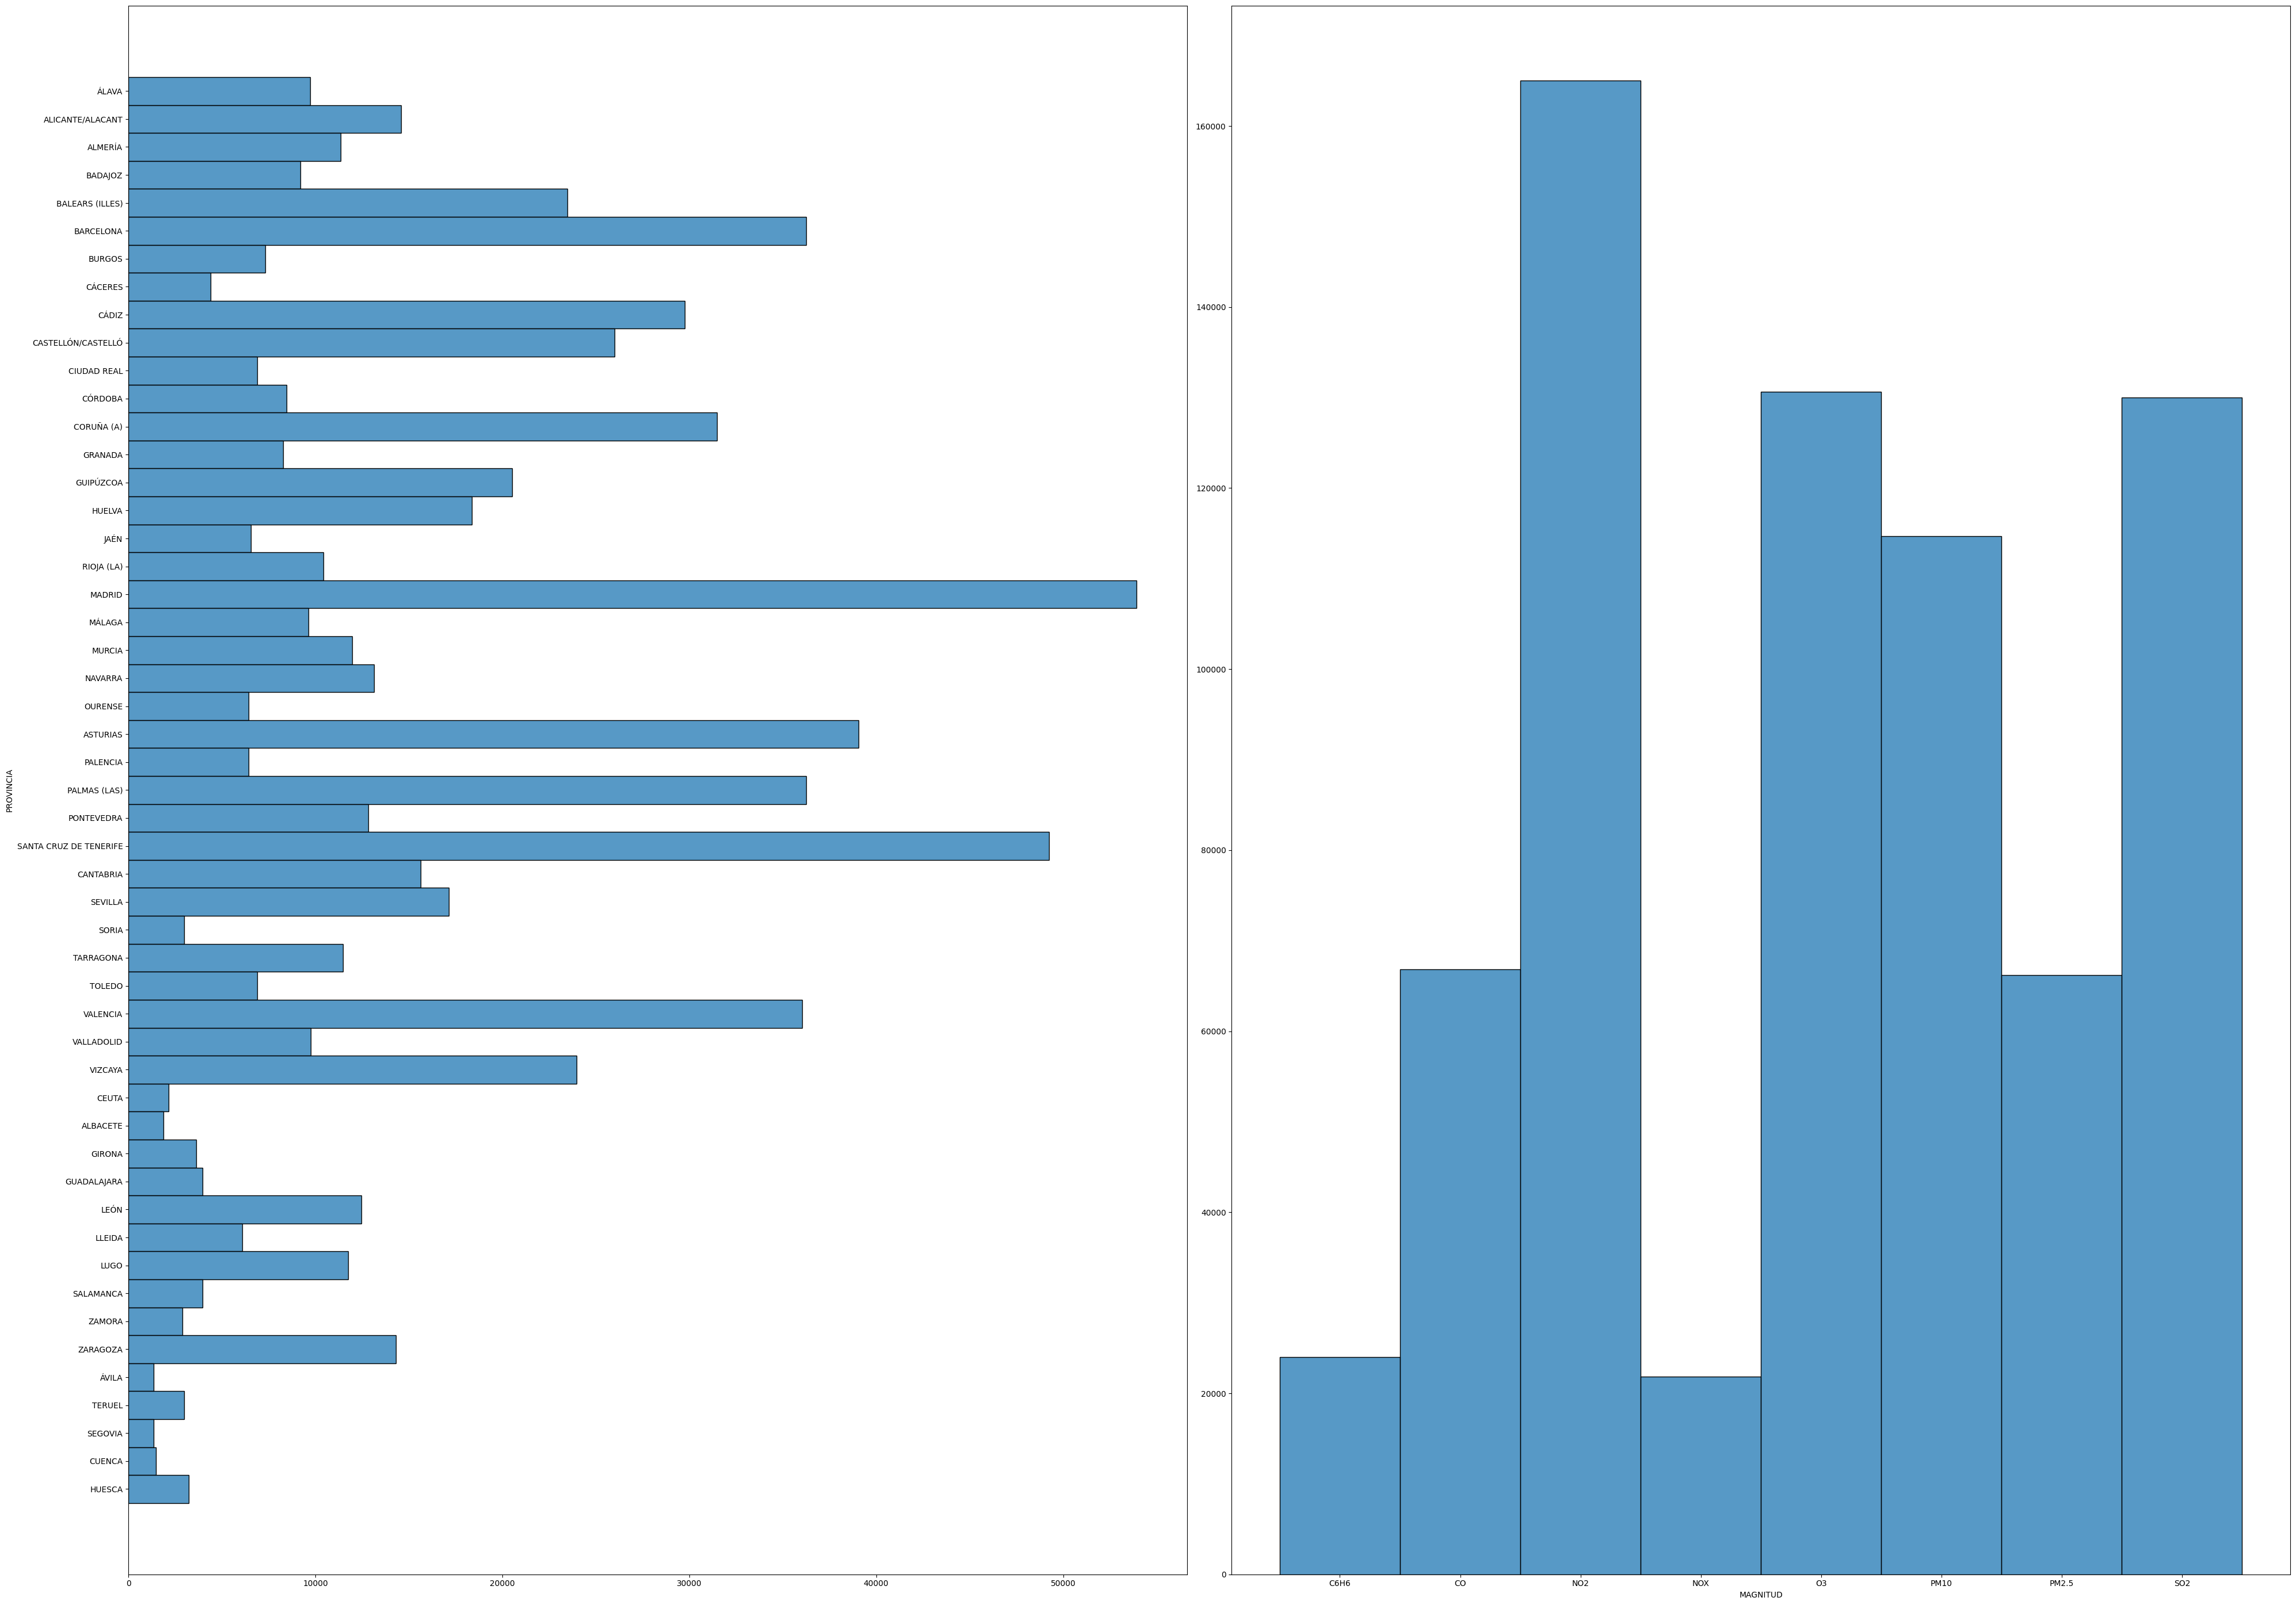

In [5]:
fig, axis = plt.subplots(1, 2, figsize = (40, 28))

# Create a multiple histogram
sns.histplot(ax = axis[0], data = clean_df, y = 'PROVINCIA').set(xlabel = None)
sns.histplot(ax = axis[1], data = clean_df, x = 'MAGNITUD').set(ylabel = None)

plt.tight_layout()

# Show the plot
plt.show()

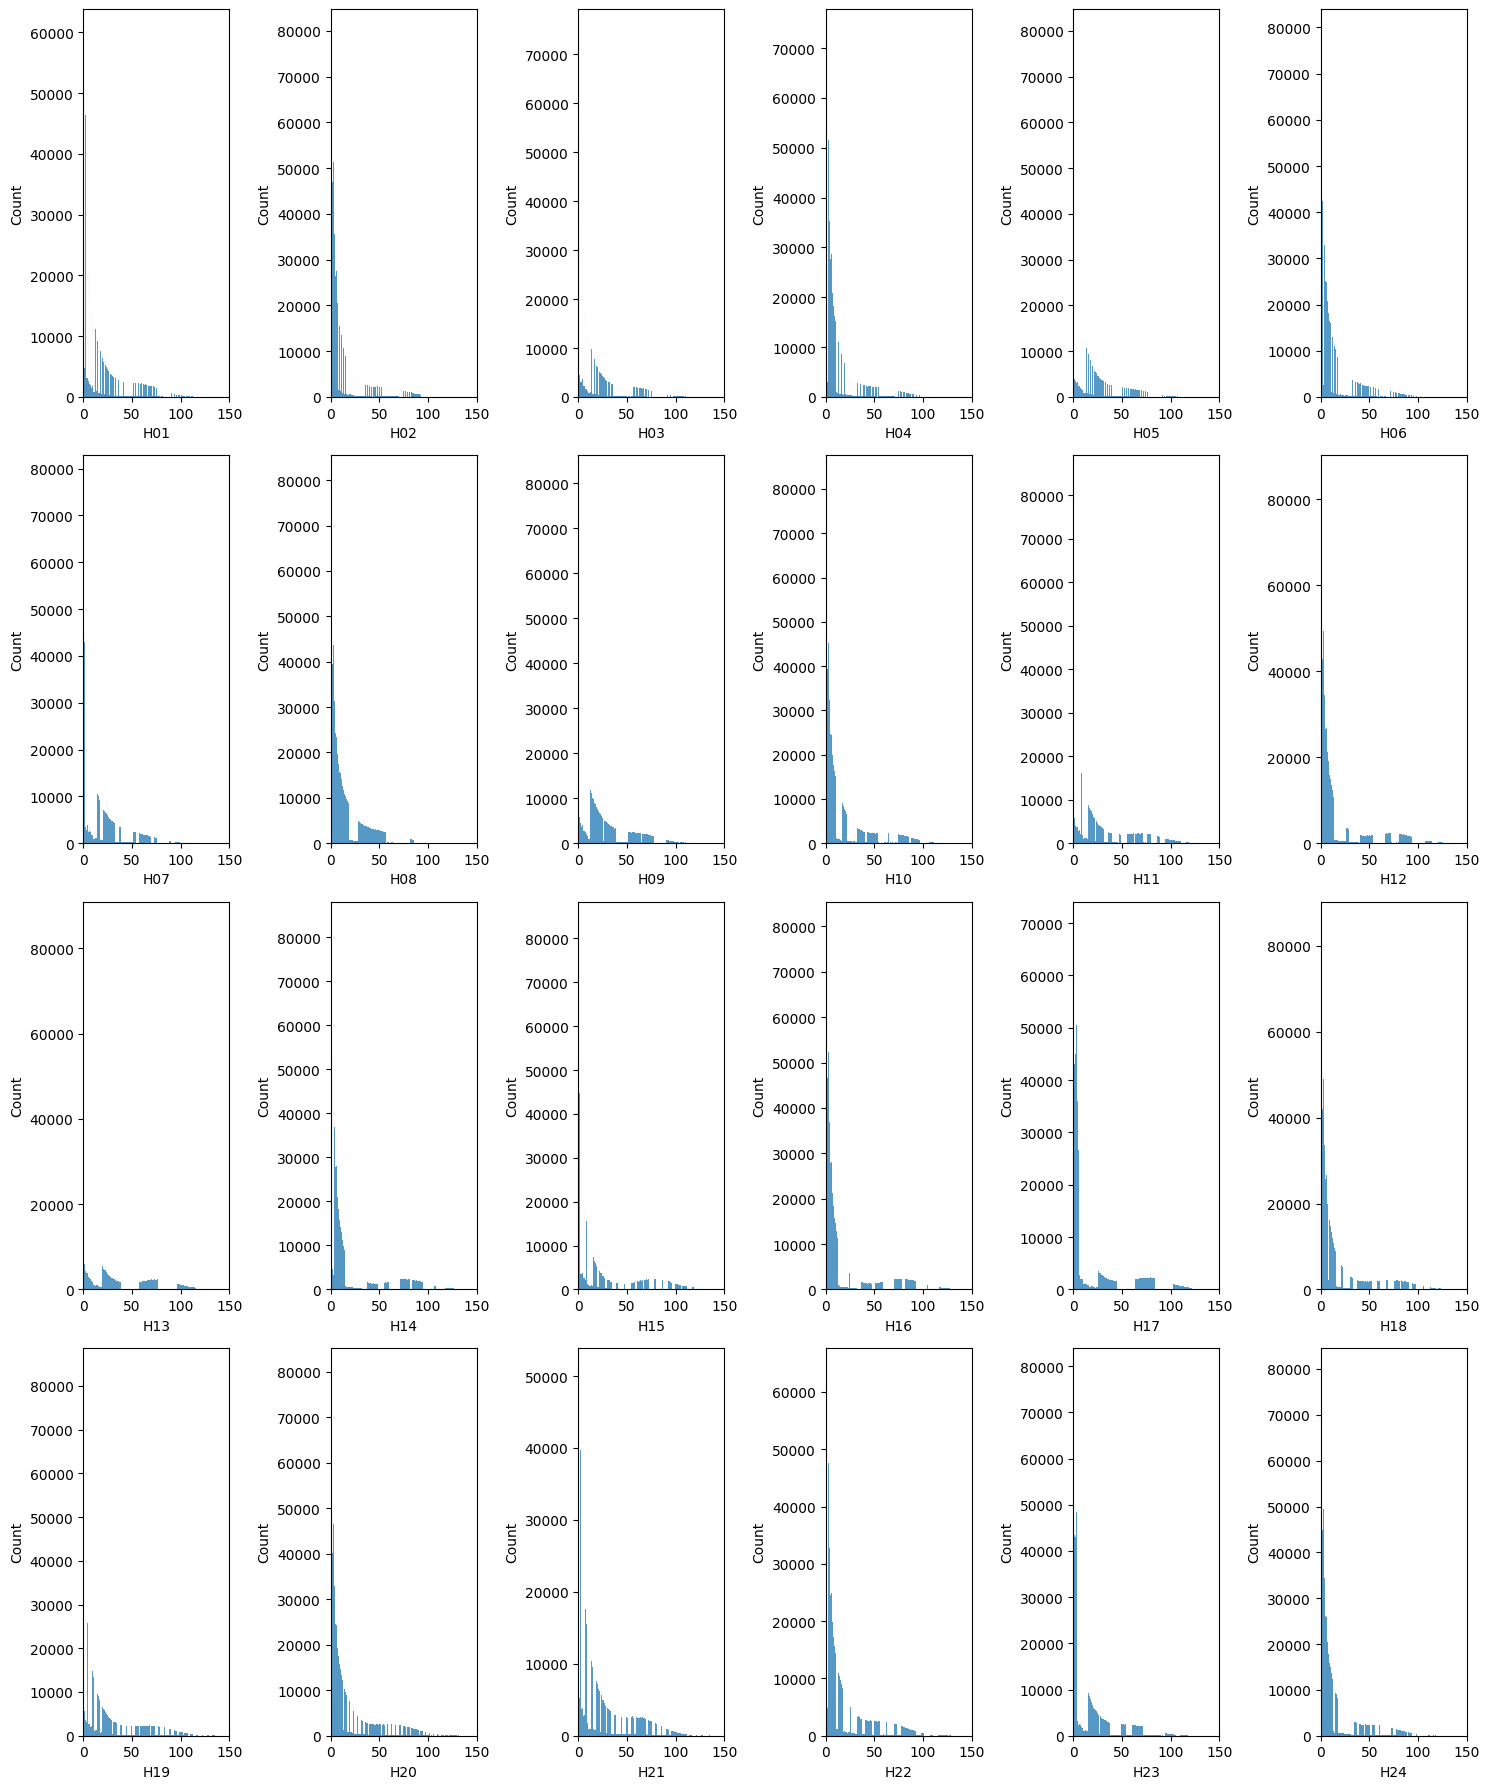

In [6]:
fig, axis = plt.subplots(4, 6, figsize = (15, 18))

sns.histplot(ax = axis[0, 0], data = clean_df, x = 'H01').set_xlim(0.0, 150)
sns.histplot(ax = axis[0, 1], data = clean_df, x = 'H02').set_xlim(0.0, 150)
sns.histplot(ax = axis[0, 2], data = clean_df, x = 'H03').set_xlim(0.0, 150)
sns.histplot(ax = axis[0, 3], data = clean_df, x = 'H04').set_xlim(0.0, 150)
sns.histplot(ax = axis[0, 4], data = clean_df, x = 'H05').set_xlim(0.0, 150)
sns.histplot(ax = axis[0, 5], data = clean_df, x = 'H06').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 0], data = clean_df, x = 'H07').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 1], data = clean_df, x = 'H08').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 2], data = clean_df, x = 'H09').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 3], data = clean_df, x = 'H10').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 4], data = clean_df, x = 'H11').set_xlim(0.0, 150)
sns.histplot(ax = axis[1, 5], data = clean_df, x = 'H12').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 0], data = clean_df, x = 'H13').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 1], data = clean_df, x = 'H14').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 2], data = clean_df, x = 'H15').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 3], data = clean_df, x = 'H16').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 4], data = clean_df, x = 'H17').set_xlim(0.0, 150)
sns.histplot(ax = axis[2, 5], data = clean_df, x = 'H18').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 0], data = clean_df, x = 'H19').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 1], data = clean_df, x = 'H20').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 2], data = clean_df, x = 'H21').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 3], data = clean_df, x = 'H22').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 4], data = clean_df, x = 'H23').set_xlim(0.0, 150)
sns.histplot(ax = axis[3, 5], data = clean_df, x = 'H24').set_xlim(0.0, 150)

plt.tight_layout()

# Show the plot
plt.show()

In [7]:
clean_df.describe()

,ESTACION,LATITUD,LONGITUD,H01,H02,H03,H04,H05,H06,H07,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,719282.000000,715747.000000,715747.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,...,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000,719282.000000
mean,32.388329,39.161508,-4.714866,17.067012,16.515271,16.074614,15.785590,15.766742,16.156043,17.018112,...,21.549333,21.613501,21.646578,21.603703,21.416290,20.968182,20.293110,19.437662,18.556998,17.745090
std,149.922533,4.521039,5.031532,25.985205,25.327286,24.575764,23.991207,23.639544,23.473510,23.808834,...,33.184788,33.393461,33.727106,33.962276,33.278152,32.218429,31.342378,30.038861,28.461359,27.069425
min,1.000000,27.772600,-17.921670,-0.131800,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011900,...,0.000000,-0.075800,-0.155000,0.000000,0.000000,-0.070400,-0.291300,-0.185000,0.000000,0.000000
25%,1.000000,37.555020,-6.395000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.056250,2.300000,2.200000,2.000000,2.000000,2.000000
50%,4.000000,40.416670,-3.808610,7.000000,6.200000,6.000000,6.000000,7.000000,7.000000,8.000000,...,6.600000,7.000000,7.000000,8.000000,8.000000,8.400000,8.100000,8.000000,7.900000,7.000000
75%,11.000000,42.457800,-1.100830,21.000000,20.000000,19.040000,19.000000,20.000000,21.000000,23.230000,...,23.300000,24.000000,25.000000,26.000000,27.000000,28.000000,27.000000,26.000000,24.000000,23.000000
max,999.000000,43.686270,4.323890,1305.000000,1218.000000,1210.000000,1210.000000,1963.000000,2090.000000,1938.000000,...,1790.000000,1984.810000,2169.000000,2517.000000,2296.000000,1985.000000,2342.220000,2778.940000,2109.440000,1628.430000


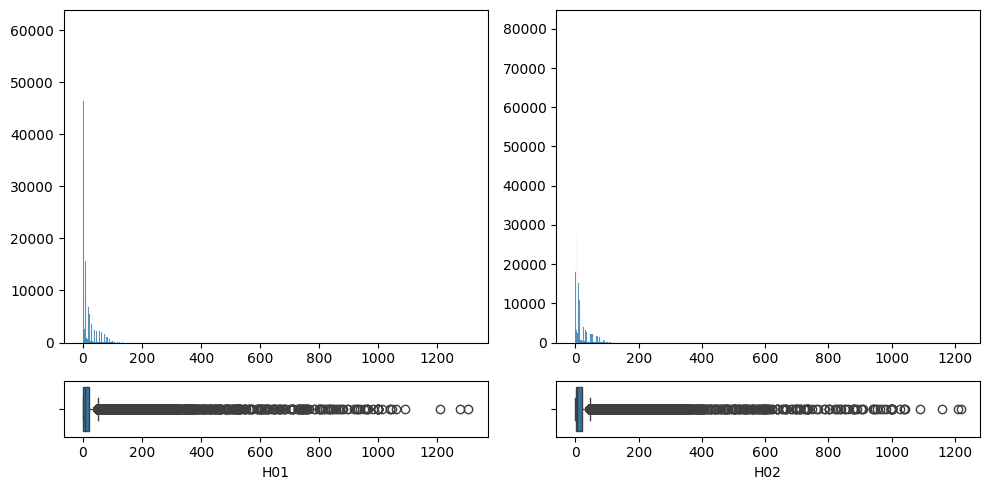

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = clean_df, x = 'H01').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = clean_df, x = 'H01')
sns.histplot(ax = axis[0, 1], data = clean_df, x = 'H02').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = clean_df, x = 'H02')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()